In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d 

In [18]:
nus = ['nue','numu','nuebar','numubar']
interp_fluxes_rhc=[]
interp_fluxes_fhc=[]
for nu in nus:
    e, f = np.genfromtxt(f"RHC_{nu}.dat", unpack=True)
    finter = interp1d(e,f, bounds_error=False, fill_value=0.0)
    interp_fluxes_rhc.append(finter)

    e, f = np.genfromtxt(f"FHC_{nu}.dat", unpack=True)
    finter = interp1d(e,f, bounds_error=False, fill_value=0.0)
    interp_fluxes_fhc.append(finter)


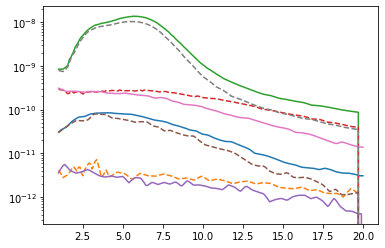

In [19]:
enu = np.linspace(1,20,200)
fluxes_fhc=[]
fluxes_rhc=[]
for f_fhc, f_rhc in zip(interp_fluxes_fhc,interp_fluxes_rhc):
    plt.plot(enu, f_fhc(enu)/1e4)
    plt.plot(enu, f_rhc(enu)/1e4, ls='--')
    fluxes_fhc.append(f_fhc(enu)/1e4)
    fluxes_rhc.append(f_rhc(enu)/1e4)
plt.yscale("log")

In [20]:
zeros_fhc=np.zeros(np.size(fluxes_fhc[0]))
data_fhc=np.stack((enu,fluxes_fhc[0],fluxes_fhc[1],zeros_fhc,fluxes_fhc[2],fluxes_fhc[3],zeros_fhc),axis=0)

zeros_rhc=np.zeros(np.size(fluxes_rhc[0]))
data_rhc=np.stack((enu,fluxes_rhc[0],fluxes_rhc[1],zeros_rhc,fluxes_rhc[2],fluxes_rhc[3],zeros_rhc),axis=0)

In [21]:
np.savetxt('../NUMI_FHC_ME.dat', data_fhc.T, header='Enu (GeV) nue numu nutau nuebar numubar nutaubar (all in nus/cm^2/GeV/POT)')
np.savetxt('../NUMI_RHC_ME.dat', data_rhc.T, header='Enu (GeV) nue numu nutau nuebar numubar nutaubar (all in nus/cm^2/GeV/POT)')

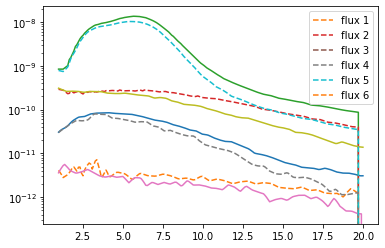

In [29]:
d_f=np.loadtxt('../NUMI_FHC_ME.dat')

d_r=np.loadtxt('../NUMI_RHC_ME.dat')

for i in range(1,7):
    plt.plot(d_f[:,0],d_f[:,i])
    plt.plot(d_r[:,0],d_r[:,i],ls='--',label=rf'flux {i}')

plt.yscale('log')
plt.legend()